# Run simple linear regression

## **Introduction**

In this lab, I will provide insights about my imaginary company's sales and marketing practices. I have been assigned to a project that focuses on the influence of marketing. For this task, I will explore the relationship between the radio promotion budget and the sales revenue. 

The dataset used includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical I provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

Import relevant Python libraries and modules.

In [2]:
# Import relevant Python libraries and modules.
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("marketing_sales_data.csv")

To get a sense of what the data includes, display the first 10 rows of the data.

In [4]:
# Display the first 10 rows of the data.

data.head(10)

TV      Radio  Social Media Influencer       Sales
0     Low   1.218354      1.270444      Micro   90.054222
1  Medium  14.949791      0.274451      Macro  222.741668
2     Low  10.377258      0.061984       Mega  102.774790
3    High  26.469274      7.070945      Micro  328.239378
4    High  36.876302      7.618605       Mega  351.807328
5    High  25.561910      5.459718      Micro  261.966812
6    High  37.263819      6.886535       Nano  349.861575
7     Low  13.187256      2.766352      Macro  140.415286
8    High  29.520170      2.333157       Nano  264.592233
9     Low   3.773287      0.135074       Nano   55.674214

- The data includes the following information:
    - TV promotion budget (expressed as "Low", "Medium", or "High") 
    - Radio promotion budget
    - Social media promotion budget
    - Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
        - Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
    - Sales accrued from the promotion

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [6]:
# Display number of rows, number of columns.

data.shape

(572, 5)

Now, check for missing values in the rows of the data. 

In [7]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.

data.isna()

TV  Radio  Social Media  Influencer  Sales
0    False  False         False       False  False
1    False  False         False       False  False
2    False  False         False       False  False
3    False  False         False       False  False
4    False  False         False       False  False
..     ...    ...           ...         ...    ...
567  False  False         False       False  False
568  False  False         False       False  False
569  False  False         False       False  False
570  False  False         False       False  False
571  False  False         False       False  False

[572 rows x 5 columns]

In [8]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.

data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [9]:
# Use .sum() to get the number of rows that contain missing values.

data.isna().any(axis=1).sum()

3

In [10]:
# Use .dropna(axis=0) to drop missing values. 

data = data.dropna(axis=0)

In [11]:
# See if all rows with missing values were dropped

data.isna().any(axis=1).sum()

0

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

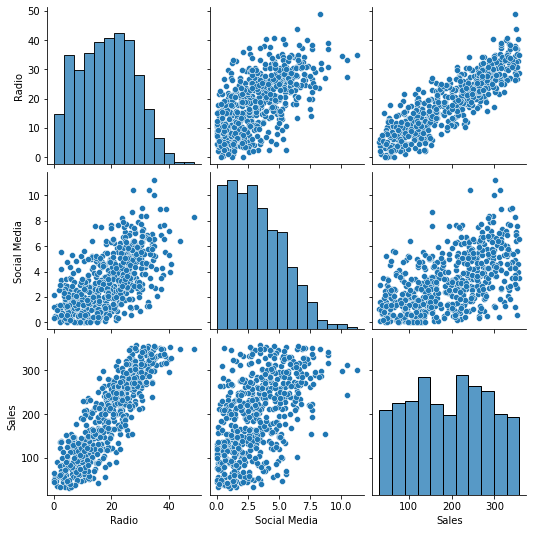

In [13]:
# Create plot of pairwise relationships.

sns.pairplot(data)


Since I have been assigned to analyze the relationship between sales and radio budget, I will check the assumptions for that relationship only. In the scatter plot of `Sales` over `Radio`, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

## **Model building** 

Select only the columns that are needed for the model.

In [18]:
# Select relevant columns.

ols_data = data[["Radio","Sales"]]

In [20]:
# Display first 5 rows of the new DataFrame.

ols_data.head(5)


Radio       Sales
0   1.218354   90.054222
1  14.949791  222.741668
2  10.377258  102.774790
3  26.469274  328.239378
4  36.876302  351.807328

In [21]:
# Write the linear regression formula.
# Save it in a variable.

ols_formula = "Sales ~ Radio"

#Remember, for formula it is depdentent ~ independent

In [22]:

import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [23]:
# Implement OLS.

OLS = ols(formula = ols_formula, data = ols_data)

In [24]:
# Fit the model to the data.
# Save the fitted model in a variable.

model = OLS.fit()

## **Results and evaluation** 


In [25]:
# Get summary of results.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Fri, 03 Jan 2025   Prob (F-statistic):          2.07e-176
Time:                        01:52:29   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table, we can find the following:
The y-intercept is 41.5326. 
The slope is 8.1733. 
sales = 8.1733 * radio promotion budget + 41.5326

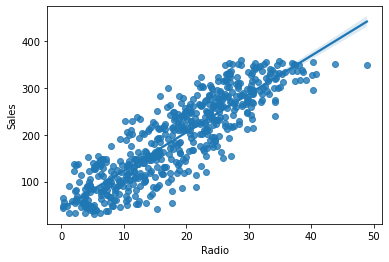

In [26]:
# Plot the OLS data with the best fit regression line.

sns.regplot(x = "Radio", y = "Sales", data = ols_data)


The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

In [27]:
# Get the residuals from the model.

residuals = model.resid


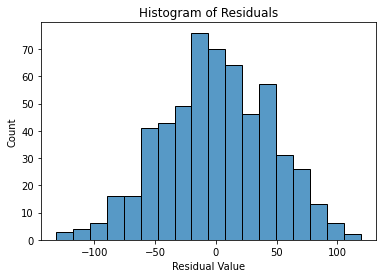

In [28]:
# Visualize the distribution of the residuals.

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

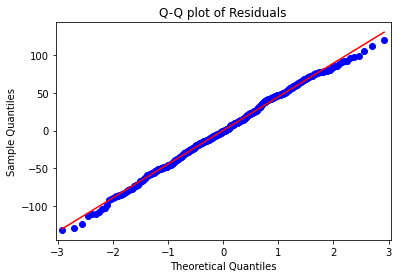

In [30]:
# Create a Q-Q plot.

sm.qqplot(residuals, line = 's')
plt.title("Q-Q plot of Residuals")
plt.show()

In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

In [31]:
# Get fitted values.

fitted_values = model.predict(ols_data["Radio"])

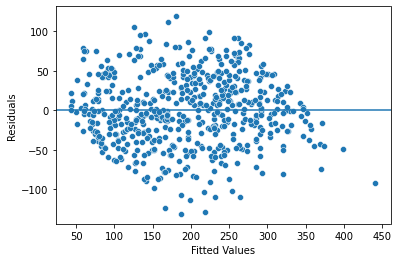

In [32]:
# Create a scatterplot of residuals against fitted values.

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

## **Considerations**

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 
    One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope. 


**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)